In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_excel("Data_Train.xlsx", engine='openpyxl',)
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df = pd.read_excel("Test_set.xlsx", engine='openpyxl',)
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_df = train_df.append(test_df)
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [5]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [6]:
# Missing Value
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

## Feature Engineering

### Training Data Preparation

In [67]:
#train_df['Date']=train_df["Date_of_Journey"].apply(lambda x:x.split('/')[0])
#train_df['Month']=train_df["Date_of_Journey"].apply(lambda x:x.split('/')[1])
#train_df['Year']=train_df["Date_of_Journey"].apply(lambda x:x.split('/')[2])

train_df['Date']=train_df["Date_of_Journey"].str.split('/').str[0]
train_df['Month']=train_df["Date_of_Journey"].str.split('/').str[1]
# train_df['Year']=train_df["Date_of_Journey"].str.split('/').str[2]

In [68]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [69]:
train_df['Date'] = train_df['Date'].astype(int)
train_df['Month'] = train_df['Month'].astype(int)
# train_df['Year'] = train_df['Year'].astype(int)
train_df.drop(["Date_of_Journey"],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [70]:
# Arrival Time
train_df["Arrival_Time"] = train_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

train_df["Arrival_Hour"] = train_df["Arrival_Time"].apply(lambda x:x.split(":")[0])
train_df["Arrival_Minute"] = train_df["Arrival_Time"].apply(lambda x:x.split(":")[1])
train_df['Arrival_Hour'] = train_df['Arrival_Hour'].astype(int)
train_df['Arrival_Minute'] = train_df['Arrival_Minute'].astype(int)
train_df.drop(["Arrival_Time"],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [71]:
# Departure Time
train_df["Dep_Time"] = train_df["Dep_Time"].apply(lambda x:x.split(" ")[0])

train_df["Dept_Hour"] = train_df["Dep_Time"].apply(lambda x:x.split(":")[0])
train_df["Dept_Minute"] = train_df["Dep_Time"].apply(lambda x:x.split(":")[1])
train_df['Dept_Hour'] = train_df['Dept_Hour'].astype(int)
train_df['Dept_Minute'] = train_df['Dept_Minute'].astype(int)
train_df.drop(["Dep_Time"],axis=1,inplace=True)
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [77]:
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_Hour       0
Arrival_Minute     0
Dept_Hour          0
Dept_Minute        0
dtype: int64

In [73]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [76]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [80]:
print(train_df.shape)
train_df.dropna(inplace=True)

(10683, 15)


In [81]:
train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})

In [84]:
train_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [86]:
# Coverting Duration in minutes

train_df["Duration"] = train_df["Duration"].str.replace("h","*60").str.replace("m","*1").str.replace(" ","+").apply(eval)

In [88]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  int64 
 5   Total_Stops      10682 non-null  int64 
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Date             10682 non-null  int64 
 9   Month            10682 non-null  int64 
 10  Year             10682 non-null  int64 
 11  Arrival_Hour     10682 non-null  int64 
 12  Arrival_Minute   10682 non-null  int64 
 13  Dept_Hour        10682 non-null  int64 
 14  Dept_Minute      10682 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ MB


In [104]:
train_df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [105]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,2019,21,35,16,50


**Handling Categorical Data**

One can find many ways to handle categorical data. Some of them categorical data are,

- **Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
- **Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

label encoding is that it does not expand the feature space but One hot encoding expands feature space (dimensionality).

Machine learning algorithms may consider there may be relationships between the label encoded categories as we just replace category names with numbers. For example, an algorithm may interpret Business (2) as two times better than Economy (1). Actually, there might not such relationship between the categories.

To avoid this, label encoding should only be applied to target (y) values, not to input (X) values.


In [93]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [94]:
train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

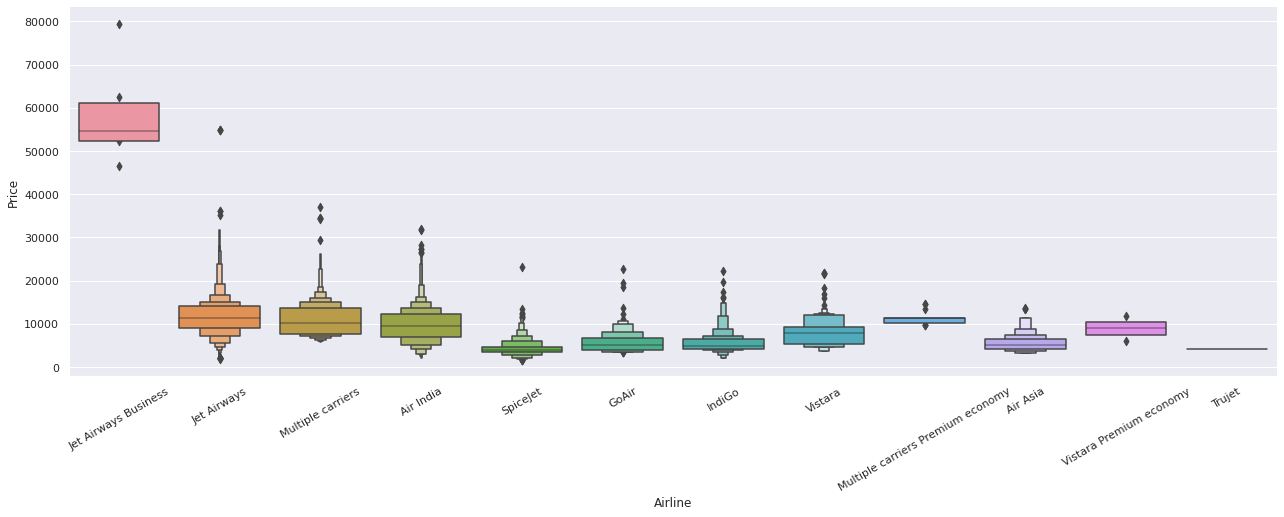

In [95]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# plt.figure(figsize=(25,6))
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)

plt.xticks(rotation=30)
plt.show()

In [96]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline = train_df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [97]:
train_df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

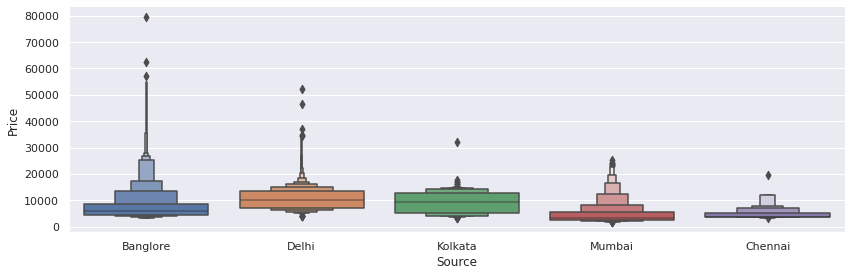

In [98]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [100]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = train_df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [102]:
train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [103]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = train_df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [106]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute
0,IndiGo,Banglore,New Delhi,170,0,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,2019,21,35,16,50


In [107]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([train_df, Airline, Source, Destination], axis = 1)

In [109]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,2019,1,10,22,20,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,2019,13,15,5,50,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,2019,4,25,9,25,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,2019,23,30,18,5,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,2019,21,35,16,50,...,0,0,0,0,0,0,0,0,0,1


In [110]:
data_train.shape

(10682, 30)

### Test data Preparation

In [112]:
# Preprocessing

print("Test data Info")
print("="*75)
print(test_df.info())

print()
print()

print("Null values :")
print("="*75)
test_df.dropna(inplace = True)
print(test_df.isnull().sum())
print("="*75)

test_df['Date']=test_df["Date_of_Journey"].str.split('/').str[0]
test_df['Month']=test_df["Date_of_Journey"].str.split('/').str[1]
# test_df['Year']=test_df["Date_of_Journey"].str.split('/').str[2]

# test_df.head()

test_df['Date'] = test_df['Date'].astype(int)
test_df['Month'] = test_df['Month'].astype(int)
# test_df['Year'] = test_df['Year'].astype(int)
test_df.drop(["Date_of_Journey"],axis=1,inplace=True)
# test_df.head()

# Arrival Time
test_df["Arrival_Time"] = test_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

test_df["Arrival_Hour"] = test_df["Arrival_Time"].apply(lambda x:x.split(":")[0])
test_df["Arrival_Minute"] = test_df["Arrival_Time"].apply(lambda x:x.split(":")[1])
test_df['Arrival_Hour'] = test_df['Arrival_Hour'].astype(int)
test_df['Arrival_Minute'] = test_df['Arrival_Minute'].astype(int)
test_df.drop(["Arrival_Time"],axis=1,inplace=True)

# Departure Time
test_df["Dep_Time"] = test_df["Dep_Time"].apply(lambda x:x.split(" ")[0])

test_df["Dept_Hour"] = test_df["Dep_Time"].apply(lambda x:x.split(":")[0])
test_df["Dept_Minute"] = test_df["Dep_Time"].apply(lambda x:x.split(":")[1])
test_df['Dept_Hour'] = test_df['Dept_Hour'].astype(int)
test_df['Dept_Minute'] = test_df['Dept_Minute'].astype(int)
test_df.drop(["Dep_Time"],axis=1,inplace=True)

# Total Stops
print()
print("Total Stops")
print("="*75)
print(test_df['Total_Stops'].unique())
test_df['Total_Stops']=test_df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})


# Coverting Duration in minutes

test_df["Duration"] = test_df["Duration"].str.replace("h","*60").str.replace("m","*1").str.replace(" ","+").apply(eval)

# Categorical data

print("Airline")
print("="*75)
print(test_df["Airline"].value_counts())

# As Airline is Nominal Categorical data we will perform OneHotEncoding
test_Airline = test_df[["Airline"]]
test_Airline = pd.get_dummies(test_Airline, drop_first= True)
print()

print("Source")
print("="*75)
print(test_df["Source"].value_counts())
# As Source is Nominal Categorical data we will perform OneHotEncoding
test_Source = test_df[["Source"]]
test_Source = pd.get_dummies(test_Source, drop_first= True)
print()

print("Destination")
print("="*75)
print(test_df["Destination"].value_counts())
# As Destination is Nominal Categorical data we will perform OneHotEncoding
test_Destination = test_df[["Destination"]]
test_Destination = pd.get_dummies(test_Destination, drop_first = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_df, test_Airline, test_Source, test_Destination], axis = 1)

data_test.drop(["Route","Additional_Info","Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.head()

Test data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Total Stops
['1 stop' 'non-stop' '2 stops' '3 stop

,Duration,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,2019,4,25,17,30,0,...,0,0,1,0,0,1,0,0,0,0
1,240,1,12,5,2019,10,20,6,20,0,...,0,0,0,1,0,0,0,0,0,0
2,1425,1,21,5,2019,19,0,19,15,0,...,0,0,1,0,0,1,0,0,0,0
3,780,1,21,5,2019,21,0,8,0,0,...,0,0,1,0,0,1,0,0,0,0
4,170,0,24,6,2019,2,45,23,55,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. **heatmap**
2. **feature_importance_**
3. **SelectKBest**

In [115]:
pd.set_option('display.max_columns', None)
data_train.head()

,Duration,Total_Stops,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,24,3,2019,1,10,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,2019,13,15,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,2019,4,25,9,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,2019,23,30,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,2019,21,35,16,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [116]:
data_train.columns

Index(['Duration', 'Total_Stops', 'Price', 'Date', 'Month', 'Year',
       'Arrival_Hour', 'Arrival_Minute', 'Dept_Hour', 'Dept_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [127]:
X = data_train.loc[:, ['Duration', 'Total_Stops', 'Date', 'Month', 
       'Arrival_Hour', 'Arrival_Minute', 'Dept_Hour', 'Dept_Minute',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Duration,Total_Stops,Date,Month,Arrival_Hour,Arrival_Minute,Dept_Hour,Dept_Minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,24,3,1,10,22,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,13,15,5,50,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,9,6,4,25,9,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1,12,5,23,30,18,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1,1,3,21,35,16,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [119]:
y = data_train.iloc[:, 2]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [125]:
train_df.drop(['Year'],axis=1,inplace=True)
test_df.drop(['Year'],axis=1,inplace=True)
data_train.drop(['Year'],axis=1,inplace=True)
data_test.drop(['Year'],axis=1,inplace=True)

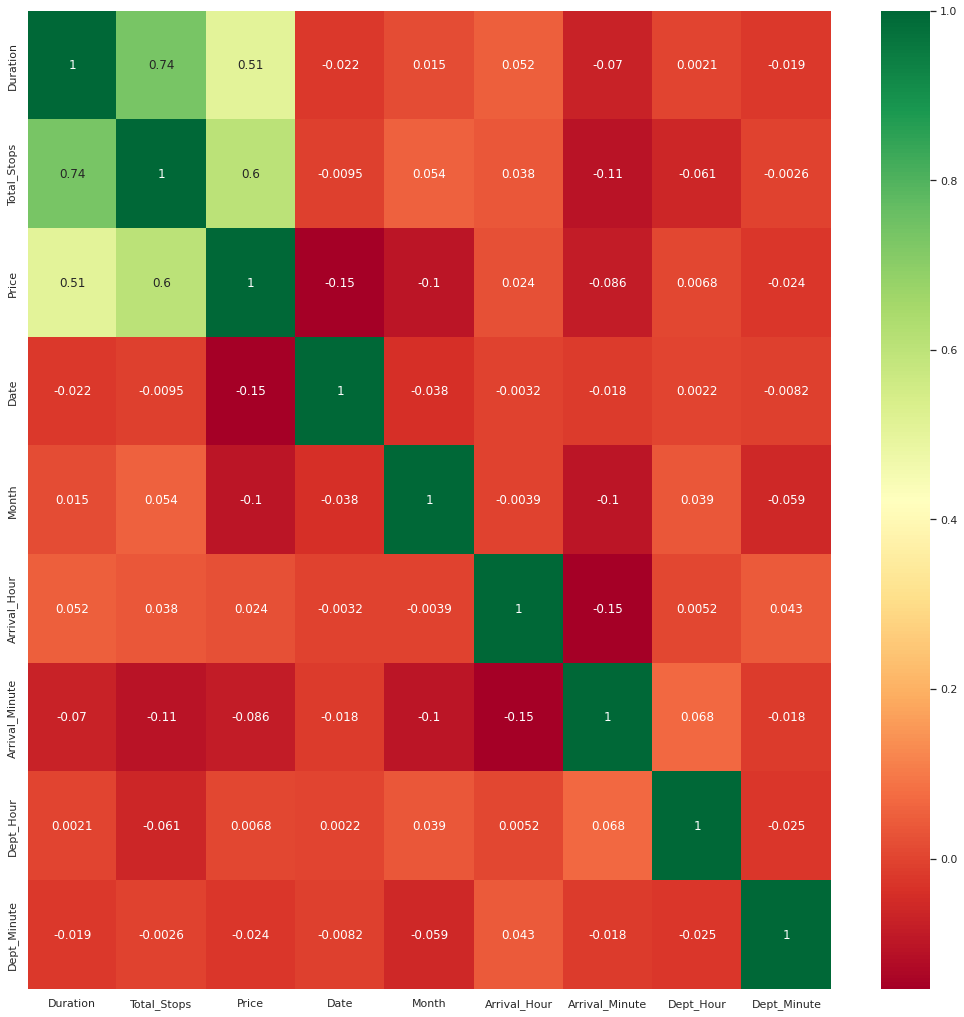

In [126]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [128]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

/home/shrinivas/Nitin.Desai/ocr/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [129]:
print(selection.feature_importances_)

[7.39009938e-02 2.50638827e-01 1.51140899e-01 5.05052744e-02
 2.86222166e-02 2.34689660e-02 2.66984452e-02 2.43177215e-02
 8.41403290e-03 2.22241897e-03 2.24398179e-02 1.49266873e-01
 6.71663538e-02 1.69087916e-02 8.68139106e-04 4.43826940e-03
 1.69790476e-04 4.53260118e-03 6.19640588e-05 2.54777174e-04
 3.44442489e-03 2.85868857e-03 5.20064403e-03 1.70522927e-02
 3.13125672e-02 8.17895116e-03 3.75363273e-04 2.55398946e-02]


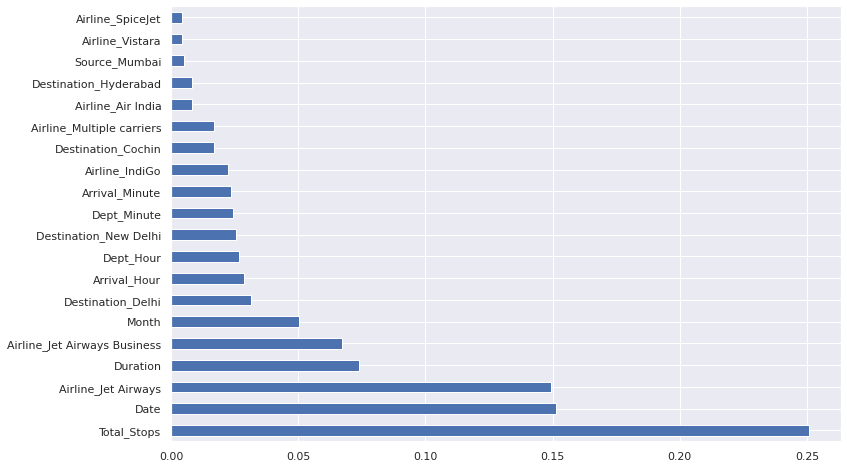

In [130]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Fitting model using Random Forest 

1. Split dataset into train and test set in order to prediction w.r.t X_test 
2. If needed do scaling of data
    - Scaling is not done in Random forest
4. Import model
5. Fit the data
6. Predict w.r.t X_test
7. In regression check **RSME** Score
8. Plot graph

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [132]:

from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
y_pred = reg_rf.predict(X_test)

In [134]:
reg_rf.score(X_train, y_train)

0.9425050542112555

In [135]:
reg_rf.score(X_test, y_test)

0.8102304235544135

/home/shrinivas/Nitin.Desai/ocr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


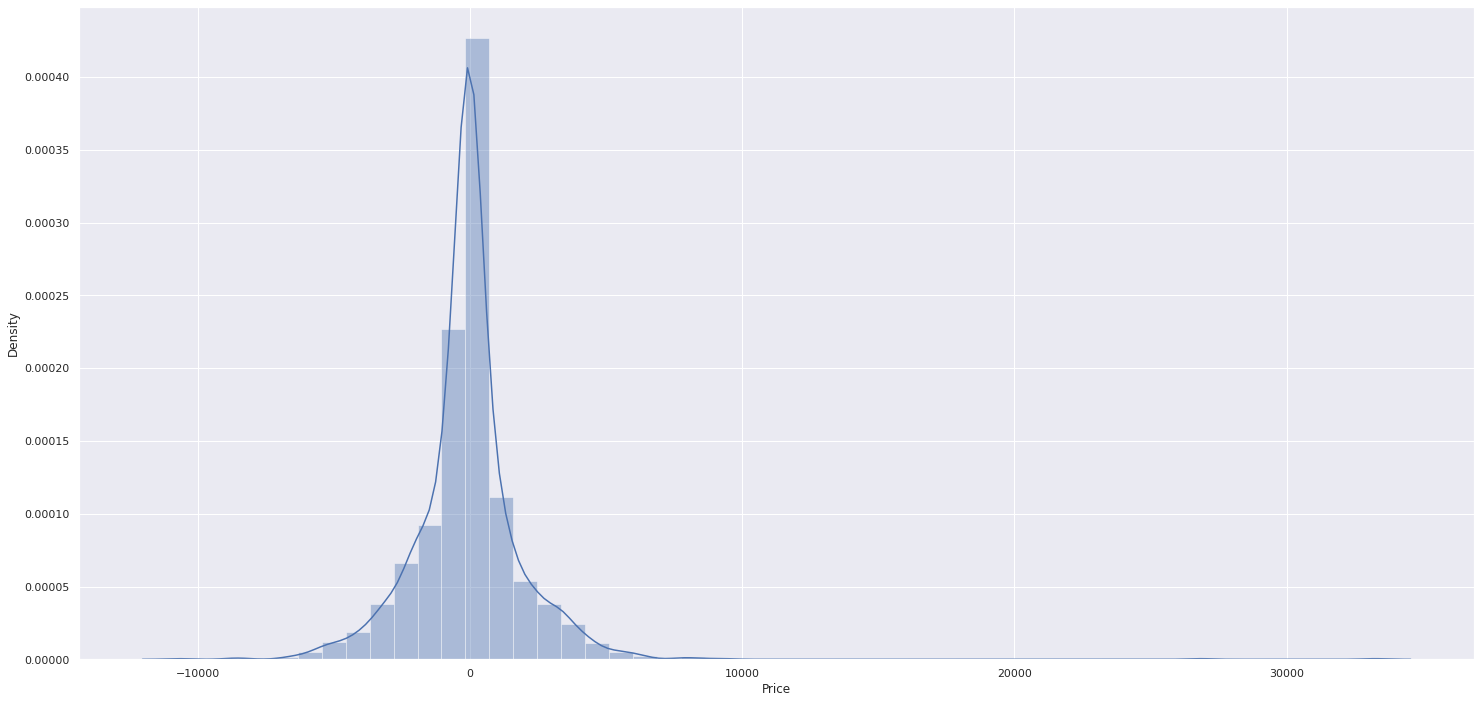

In [136]:
sns.distplot(y_test-y_pred)
plt.show()

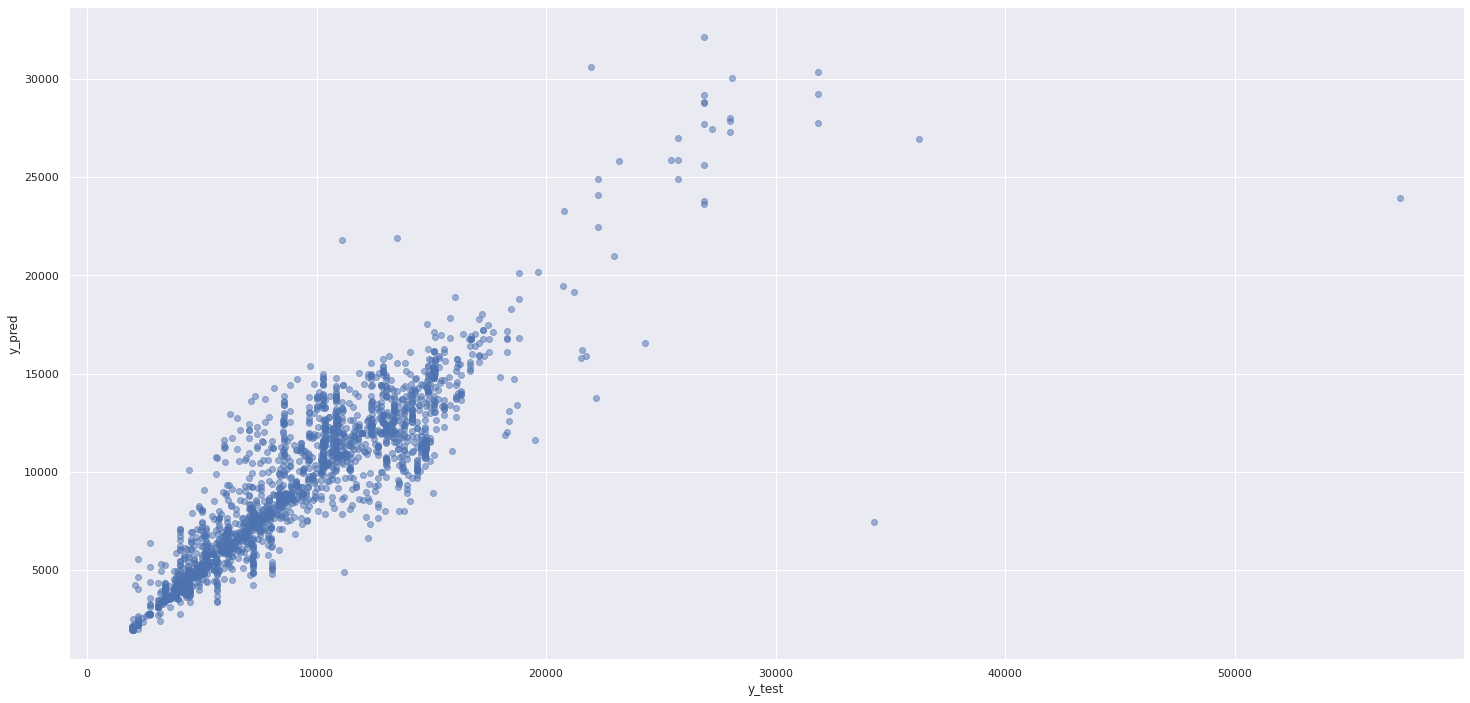

In [137]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [138]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1193.9150903817235
MSE: 4091822.29593206
RMSE: 2022.8253251163483


In [139]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [140]:
metrics.r2_score(y_test, y_pred)

0.8102304235544135

<br><br>

## Hyperparameter Tuning
- Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

In [141]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [142]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [143]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [144]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [145]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [146]:
prediction = rf_random.predict(X_test)

/home/shrinivas/Nitin.Desai/ocr/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


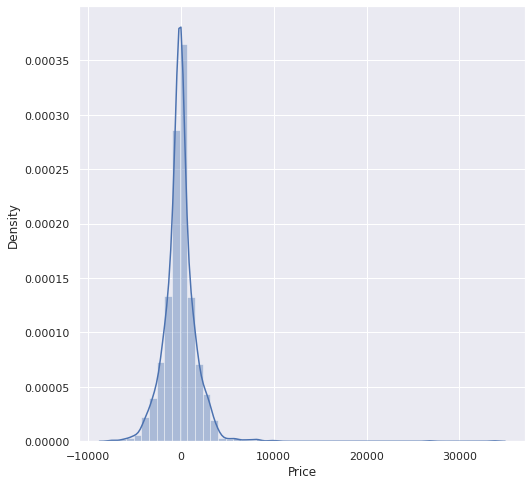

In [147]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

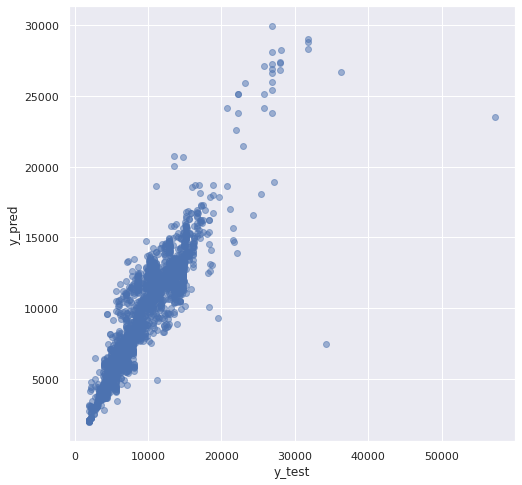

In [148]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [149]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1147.5381849435748
MSE: 3574992.6280360725
RMSE: 1890.7650906540644


In [156]:
import pickle
# open a file, where you ant to store the data
file = open('flight_fare/flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [157]:
model = open('flight_fare/flight_rf.pkl','rb')
forest = pickle.load(model)

In [158]:
y_prediction = forest.predict(X_test)

In [159]:
metrics.r2_score(y_test, y_prediction)

0.8341998288896944